# BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

## Business Use Case
There has been a revenue decline for a Portuguese bank and they would like to know what
actions to take. After investigation, they found out that the root cause is that their clients are not
depositing as frequently as before. Knowing that term deposits allow banks to hold onto a
deposit for a specific amount of time, so banks can invest in higher gain financial products to
make a profit. In addition, banks also hold better chance to persuade term deposit clients into
buying other products such as funds or insurance to further increase their revenues. As a result,
the Portuguese bank would like to identify existing clients that have higher chance to subscribe
for a term deposit and focus marketing efforts on such clients.

## Project Description
Your client is a retail banking institution. Term deposits are a major source of income for
a bank. A term deposit is a cash investment held at a financial institution. Your money is
invested for an agreed rate of interest over a fixed amount of time, or term. The bank
has various outreach plans to sell term deposits to their customers such as email
marketing, advertisements, telephonic marketing and digital marketing. Telephonic
marketing campaigns still remain one of the most effective way to reach out to people.
However, they require huge investment as large call centers are hired to actually
execute these campaigns. Hence, it is crucial to identify the customers most likely to
convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their
marital status, etc. Along with the client data, you are also provided with the information
of the call such as the duration of the call, day and month of the call, etc. Given this
information, your task is to predict if the client will subscribe to term deposit.

## About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese
banking institution. The classification goal of this dataset is to predict if the client or the
customer of polish banking institution will subscribe a term deposit product of the bank
or not.

## You are provided with following 2 files:
- **train.csv** : Use this dataset to train the model. This file contains all the client
and call details as well as the target variable “subscribed”. You have to train your
model using this file.
- **test.csv** : Use the trained model to predict whether a new set of clients will
subscribe the term deposit.

## Dataset Attributes
Here is the description of all the variables:
- Variable: Definition
- ID: Unique client ID
- age: Age of the client
- job: Type of job
- marital: Marital status of the client
- education: Education level
- default: Credit in default.
- housing: Housing loan
- loan: Personal loan
- contact: Type of communication
- month: Contact month
- day_of_week: Day of week of contact
- duration: Contact duration
- campaign: number of contacts performed during this campaign to the client
- pdays: number of days that passed by after the client was last contacted
- previous: number of contacts performed before this campaign
- poutcome: outcome of the previous marketing campaign
Output variable (desired target):
- Subscribed (target): has the client subscribed a term deposit? (YES/NO)

## Dataset Link-
-  https://github.com/dsrscientist/dataset5
-  https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv
-  https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from scipy import stats
import scipy.stats as stats
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score,recall_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve
import warnings
warnings.filterwarnings('ignore')


 https://github.com/dsrscientist/dataset5
 https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv
 https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv

## Loading Dataset

In [2]:
# loading the data
train = pd.read_csv('termdeposit_train.csv')
test = pd.read_csv('termdeposit_test.csv')

In [3]:
train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [4]:
test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


## EDA(Exploratory Data Analysis)

In [5]:
#checking the shape of dataset
print("There are {} rows and {} columns respectively present in the dataset.".format(*train.shape))

There are 31647 rows and 18 columns respectively present in the dataset.


In [6]:
# checking columns in Dataset
print("these are the columns present in the dataset:  \n\n",train.columns)

these are the columns present in the dataset:  

 Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')


In [7]:
#checking null values in Dataset
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

<AxesSubplot:>

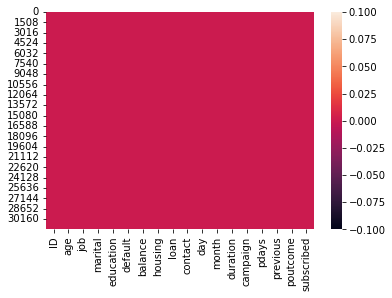

In [8]:
#ploting the heatmap for null values
sns.heatmap(train.isnull())

In [9]:
# checking duplicate values in the dataset
print("There are {} duplicates present in the dataset".format(train.duplicated().sum()))

There are 0 duplicates present in the dataset


In [10]:
# checking information about dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


#### Descriptive Analysis

In [11]:
# Describing the Dataset
train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Observation:
- Age: The average age of the customers in the dataset is approximately 41 years, with a standard deviation of around 11 years. The youngest customer is 18 years old, while the oldest is 95 years old.

- Balance: The average balance across all customers is about 1364 monetary units, with a standard deviation of approximately 3028. The minimum balance is negative, indicating that some customers have negative balances. The maximum balance is quite high at 102,127 monetary units.

- Day: The 'day' column represents the day of the month when the customer was last contacted. The values range from 1 to 31, indicating the entire month. The mean value is approximately 16, indicating that the dataset contains a fairly even distribution of contact days throughout the month.

- Duration: The 'duration' column represents the duration of the last contact in seconds. The average duration is around 258 seconds (a little over 4 minutes), with a standard deviation of about 257 seconds. The minimum duration is 0 seconds, which could indicate that some customers were not contacted, while the maximum duration is 4918 seconds.

- Campaign: The 'campaign' column denotes the number of contacts performed during the current marketing campaign for each customer. On average, customers were contacted approximately 3 times, with a standard deviation of around 3. The minimum number of contacts is 0, indicating that some customers were not contacted during the campaign, while the maximum number of contacts is 63.

- Pdays: The 'pdays' column represents the number of days that passed since the customer was last contacted (from a previous campaign). A value of -1 indicates that the customer was not previously contacted. The average value is approximately 40, with a standard deviation of around 99. The maximum value is 871, which suggests that some customers were contacted quite a long time ago.

- Previous: The 'previous' column indicates the number of contacts performed before the current campaign. On average, customers had approximately 1 previous contact, with a standard deviation of about 2. The minimum number of previous contacts is 0, while the maximum is 275.

In [12]:
# dropping the id columns . It has no relation or importance to make a prediction
train.drop('ID',axis=1,inplace=True)

#### Saperating Categorical and Numerical Column

In [13]:
# Saperating Categorical and Numerical Column

def separate_columns(data):
    categorical_cols = []
    numerical_cols = []

    for column in data.columns:
        if data[column].dtype == 'object':
            categorical_cols.append(column)
        else:
            numerical_cols.append(column)

    return categorical_cols, numerical_cols

categorical_columns, numerical_columns = separate_columns(train)

print("Categorical columns:")
print(categorical_columns)

print("\nNumerical columns:")
print(numerical_columns)


Categorical columns:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']

Numerical columns:
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [14]:
# Checking Value Counts of Categorical Column
for col in categorical_columns:
  print('*'*10,col,'*'*10)
  print(train[col].value_counts)

********** job **********
<bound method IndexOpsMixin.value_counts of 0            admin.
1           unknown
2          services
3        management
4        technician
            ...    
31642    management
31643    management
31644    management
31645    technician
31646    management
Name: job, Length: 31647, dtype: object>
********** marital **********
<bound method IndexOpsMixin.value_counts of 0         married
1         married
2         married
3        divorced
4         married
           ...   
31642      single
31643    divorced
31644      single
31645     married
31646    divorced
Name: marital, Length: 31647, dtype: object>
********** education **********
<bound method IndexOpsMixin.value_counts of 0          unknown
1        secondary
2        secondary
3         tertiary
4        secondary
           ...    
31642     tertiary
31643     tertiary
31644     tertiary
31645    secondary
31646    secondary
Name: education, Length: 31647, dtype: object>
********** default *

## Visualization

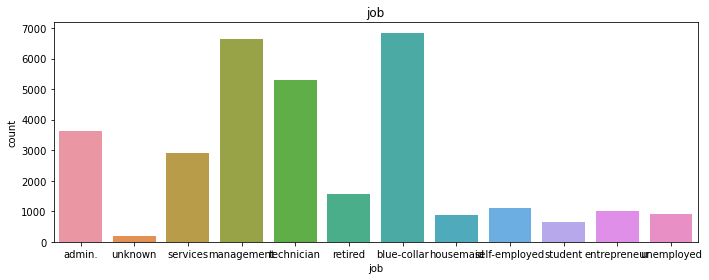

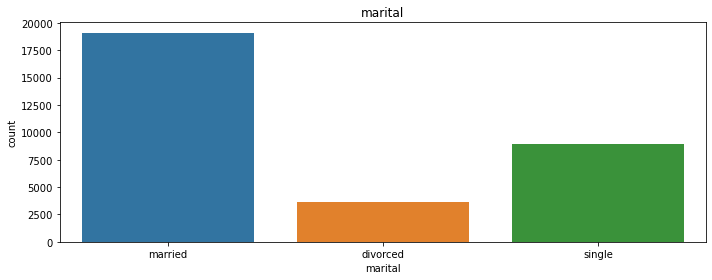

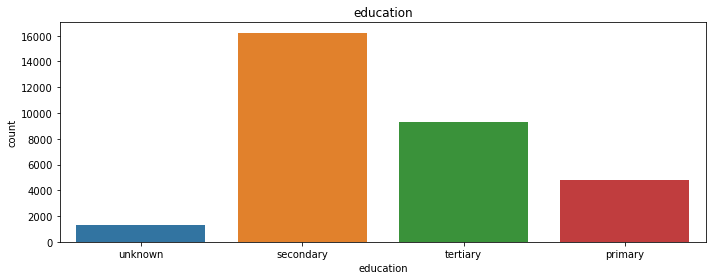

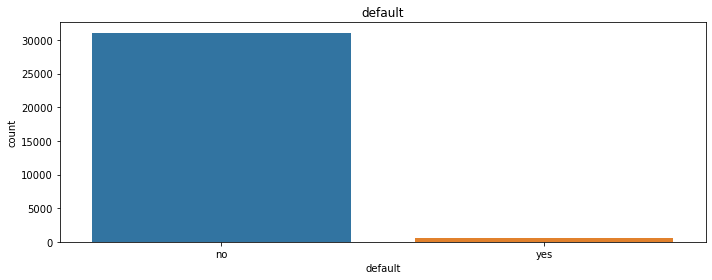

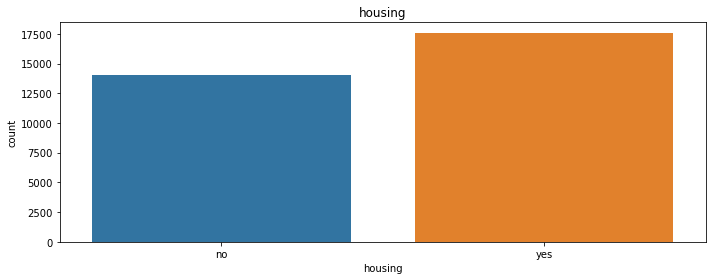

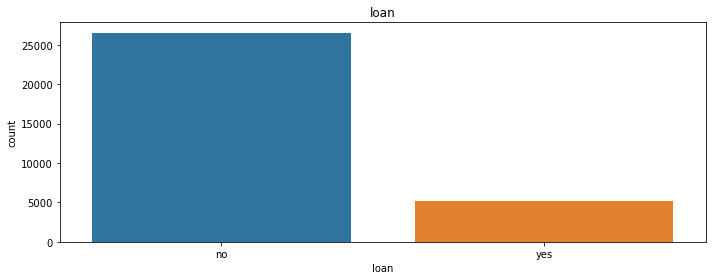

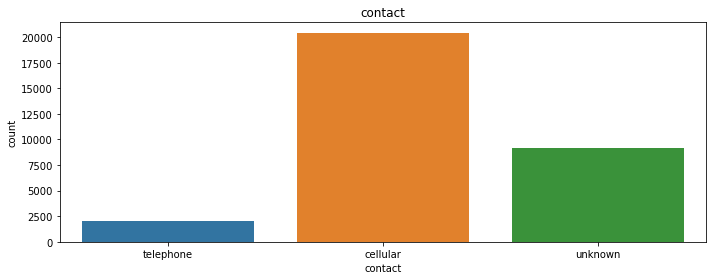

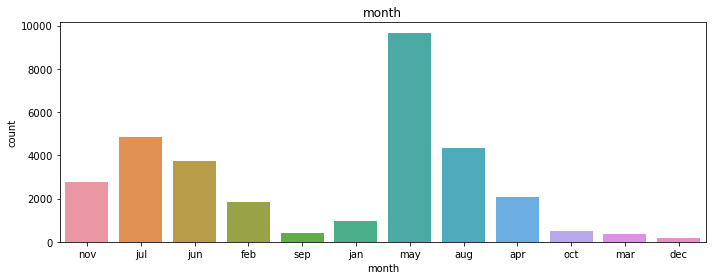

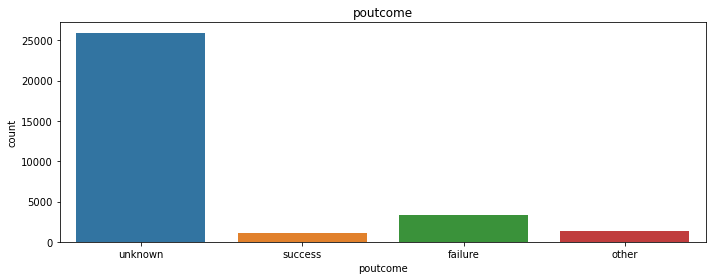

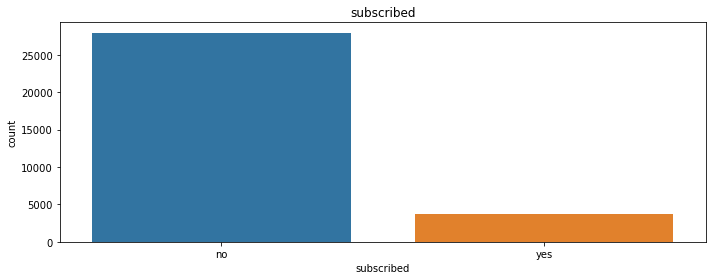

In [15]:
# Countplot of Categorical Columns
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=train, x=col)
    plt.title(col)
    plt.tight_layout()
    plt.show()


observations:
- Job: The audiences of these campaigns target mostly administrators, blue-collars, and technicians.
- Marital status: Most of them are married; married clients are twice as single people.
- Education: Most clients have university education level while illiterate people are very less.
- default/credit: Most people have no default stay on their credit file.
- housing: Most people have no housing loan. loan: Most people have no personal loan.
- contact: Common means of communication are cellular.
- month - May is the busy month and December is the least busy month (because of the holidays season).
- day of week: Thursday is the most busy day while Friday is the least busy day of the week.

## List of normalized relative frequency of the target class per category.

Normalized distribution of each class per feature and plotted difference between positive and negative frequencies. Positive values imply this category favors clients that will subscribe and negative values categories that favor not buying the product.

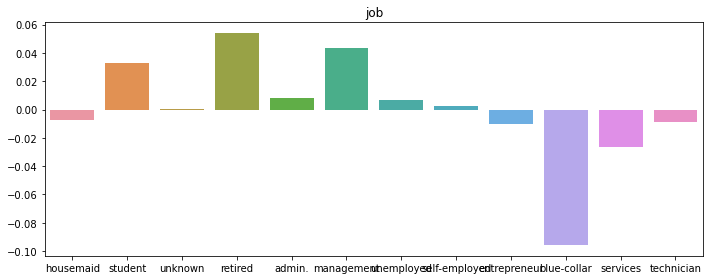

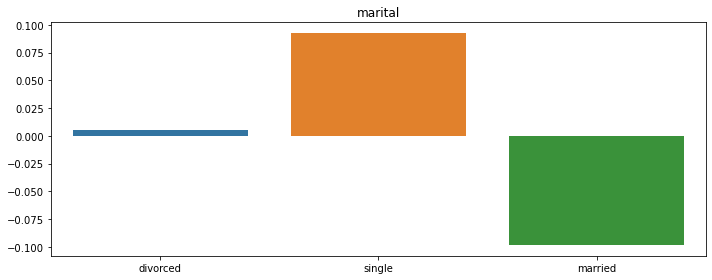

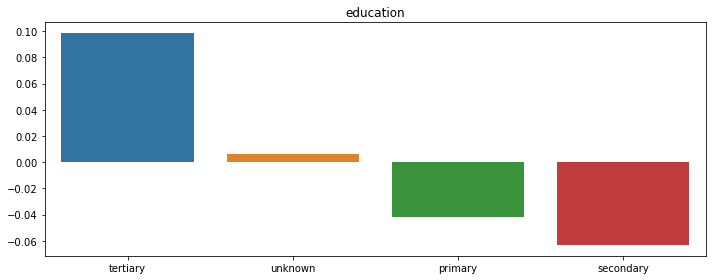

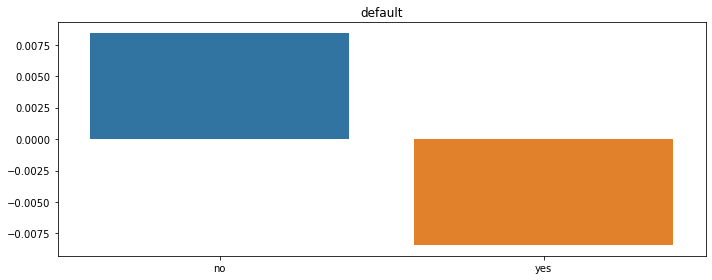

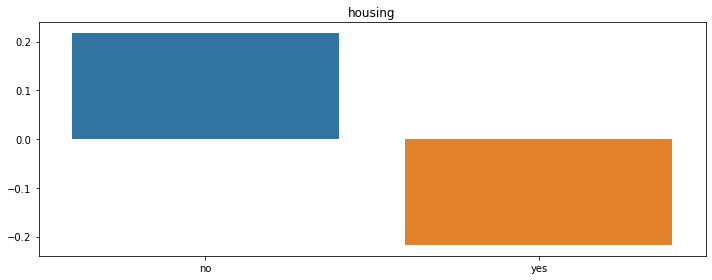

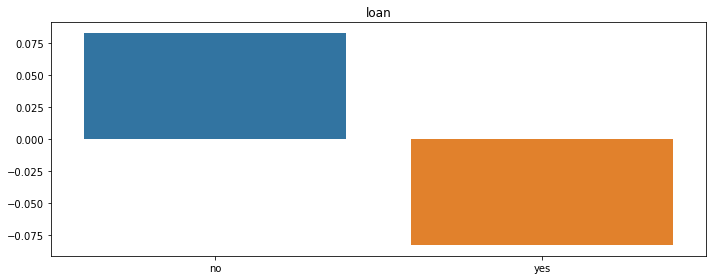

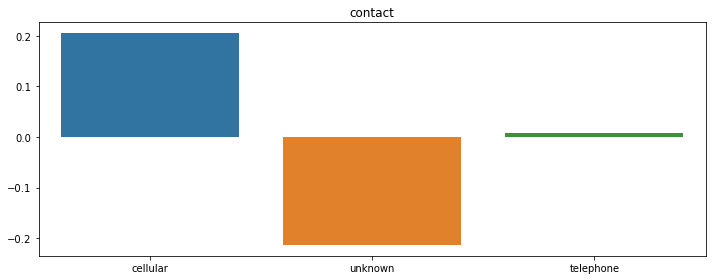

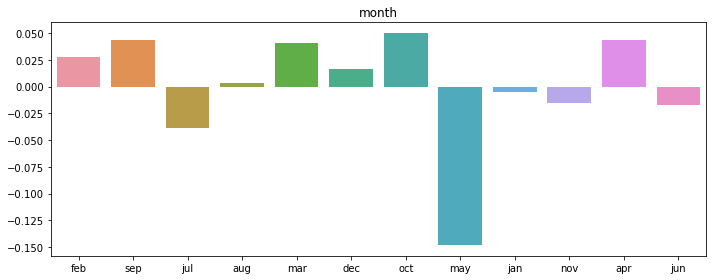

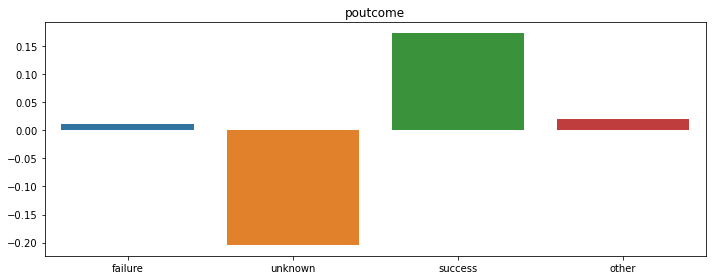

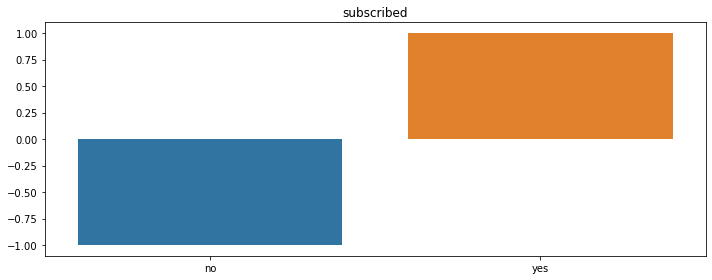

In [16]:
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    pos_counts = train.loc[train['subscribed'] == 'yes', col].value_counts()
    neg_counts = train.loc[train['subscribed'] == 'no', col].value_counts()

    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))

    freq_pos = train['subscribed'].value_counts()['yes']
    freq_neg = train['subscribed'].value_counts()['no']

    all_values = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

    sns.barplot(x=all_counts, y=all_values)
    plt.title(col)
    plt.tight_layout()
    plt.show()


Observation: There are unknown values for many variables in the Data set. There are many ways to handle missing data. One of the ways is to discard the row but that would lead to reduction of data set and hence would not serve our purpose of building an accurate and realistic prediction model.

Other method is to smartly infer the value of the unknown variable from the other variables. This a way of doing an imputation where we use other independent variables to infer the value of the missing variable. This doesn't gurantee that all missing values will be addressed but majority of them will have a reasonable which can be useful in the prediction.

Variables with unknown/missing values are : 'education', 'job', 'housing', 'loan', 'deafult', and 'marital'. But the significant ones are 'education', 'job', 'housing', and 'loan'. The number of unknowns for 'marital' is very low. The unknown for 'default' variable are considered to be recorded as unknown. It may be possible that customer is not willing to disclose this information to the banking representative. Hence the unknown value in 'default' is actually a separate value.

Therefore, we start with creating new variables for the unknown values in 'education', 'job', 'housing' and 'loan'. We do this to see if the values are missing at random or is there a pattern in the missing values.

<AxesSubplot:xlabel='subscribed', ylabel='count'>

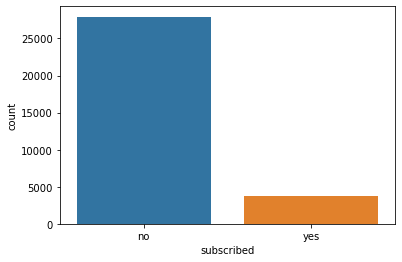

In [17]:
sns.countplot(x='subscribed', data=train)


Observation:
- Here in my target column There is values of no is vary high in compare of yes so i can say that my data is imbalanced.

In [18]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

we can clearly see that is classes in the target columns are imbalanced some we will balance the classes

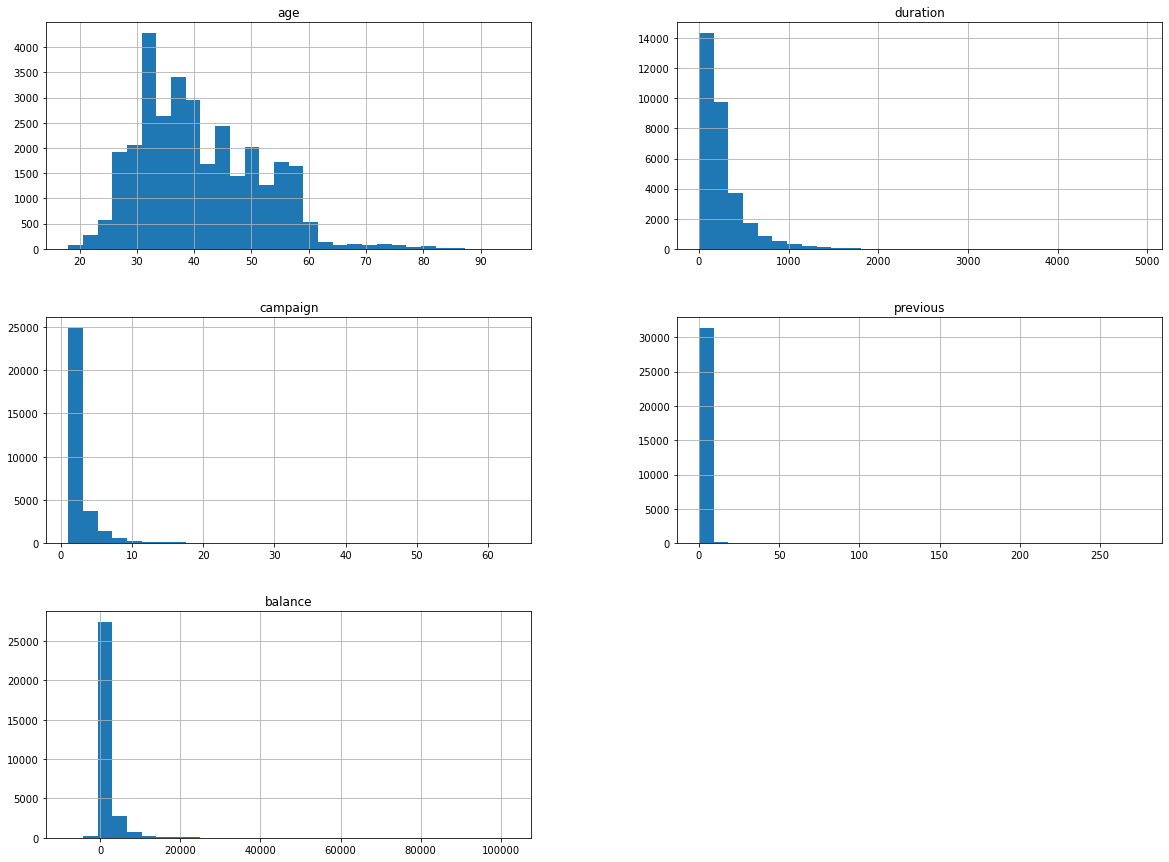

In [19]:
train[['age','duration','campaign','previous','balance']].hist(bins=30, figsize=(20,15))
plt.show()

In [20]:
#Now, we will print out the campaigns that the largest number of customers participate in

train.groupby(['campaign'])['subscribed'].count().reset_index().sort_values(by='subscribed', ascending=False).iloc[:5]

,campaign,subscribed
0,1,12262
1,2,8798
2,3,3858
3,4,2442
4,5,1245


we can clearly see that the first and second campaign are the most impactful campaign's.

### Which customers were more likely to subscribe to the term deposit? lets find out!

Text(0, 0.5, 'Frequency of Purchase')

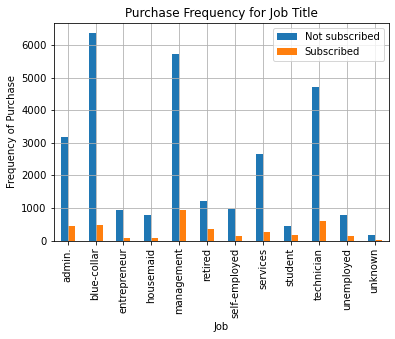

In [21]:
table = pd.crosstab(train.job, train.subscribed)
table.columns = ['Not subscribed', 'Subscribed']
table.plot(kind='bar')

plt.grid(True)

plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

In [22]:
#cross tab
table = pd.crosstab(train.job, train.subscribed)

table = round(table.div(table.sum(axis=1), axis=0).mul(100), 2)
table.columns=['notsubcribed', 'subcribed']
table.sort_values(by=['subcribed'], ascending=False).loc[:, 'subcribed']

job
student          28.66
retired          23.00
unemployed       14.25
management       13.90
unknown          12.62
self-employed    12.47
admin.           12.45
technician       11.19
housemaid         9.04
services          8.75
entrepreneur      8.43
blue-collar       7.15
Name: subcribed, dtype: float64

The target customers are admins, blue-collars and techinicians but the frequency of students and retired people subscribed to the term deposit are pretty high (28.66% for students and 23% for retired people).

Text(0, 0.5, 'Proportion of Customers')

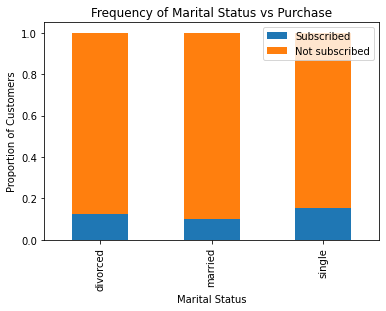

In [23]:
table = pd.crosstab(train.marital,train.subscribed
                   )
table = table.div(table.sum(1).astype(float), axis=0)
table.columns = ['Not subscribed', 'Subscribed']
table[['Subscribed', 'Not subscribed']].plot(kind='bar', stacked=True)
plt.title('Frequency of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

There is no significant impact of marital status on subscription behaviour of customers.

## changing categorical variable to numerical variable

In [24]:

train[['default','housing','loan','subscribed']]=train[['default','housing','loan','subscribed']].replace(["yes","no"],["1","0"])
train['month']=train['month'].replace(["jan","feb","mar","apr","may","jun","jul", "aug","sep","oct","nov","dec"],["1","2","3","4","5","6","7","8","9","10","11","12"])
train['job']=train['job'].replace(['unknown'],['other'])


train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,0,1933,0,0,telephone,19,11,44,2,-1,0,unknown,0
1,31,other,married,secondary,0,3,0,0,cellular,20,7,91,2,-1,0,unknown,0
2,27,services,married,secondary,0,891,1,0,cellular,18,7,240,1,-1,0,unknown,0
3,57,management,divorced,tertiary,0,3287,0,0,cellular,22,6,867,1,84,3,success,1
4,31,technician,married,secondary,0,119,1,0,cellular,4,2,380,1,-1,0,unknown,0


In [25]:

le=LabelEncoder()
train['job']=le.fit_transform(train['job'])
train['education']=le.fit_transform(train['education'])
train['poutcome']=le.fit_transform(train['poutcome'])
train['marital']=le.fit_transform(train['marital'])
train['contact']=le.fit_transform(train['contact'])

In [26]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,11,44,2,-1,0,3,0
1,31,5,1,1,0,3,0,0,0,20,7,91,2,-1,0,3,0
2,27,8,1,1,0,891,1,0,0,18,7,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,10,1,1,0,119,1,0,0,4,2,380,1,-1,0,3,0


## Outliers

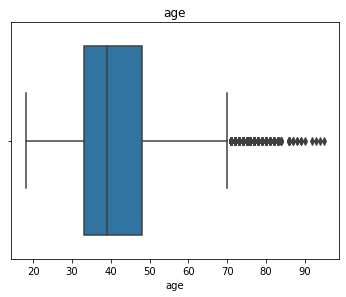

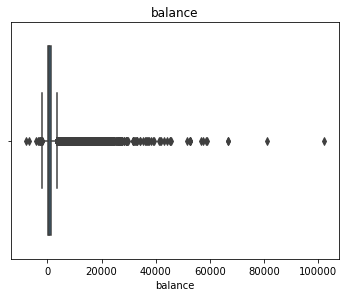

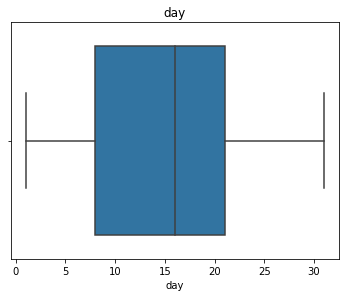

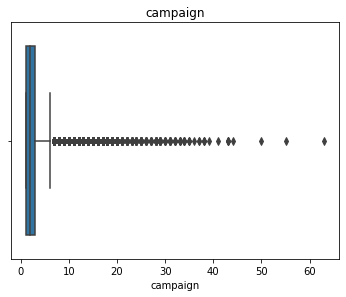

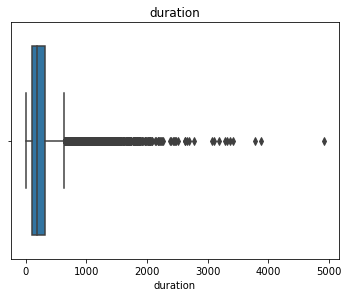

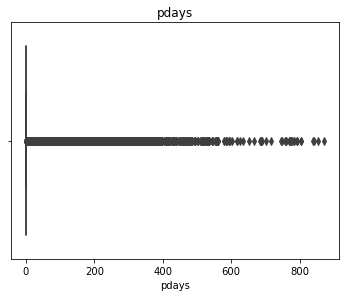

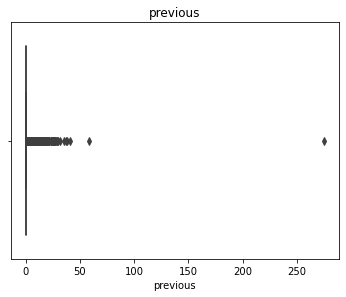

In [27]:
col=train[['age','balance','day','campaign','duration','pdays','previous']]
for i in col:
  n=1
  plt.figure(figsize=(20,20))
  plt.subplot(4,3,1)
  sns.boxplot(train[i])
  plt.title(i)
  plt.show()
  n=n+1

### remove outliers using z_score

In [29]:

z = np.abs(stats.zscore(train[['age','balance','duration','campaign','pdays','previous']]))
print(z)
train=train[(z<3).all(axis=1)]
train.shape

            age   balance  duration  campaign     pdays  previous
0      1.415793  0.187933  0.832754  0.245906  0.408555  0.237059
1      0.937156  0.449397  0.649957  0.245906  0.408555  0.237059
2      1.313627  0.156159  0.070449  0.567059  0.408555  0.237059
3      1.509911  0.635055  2.368149  0.567059  0.447299  1.001336
4      0.937156  0.411091  0.474054  0.567059  0.408555  0.237059
...         ...       ...       ...       ...       ...       ...
31642  1.125392  0.450388  0.552724  0.245906  0.408555  0.237059
31643  1.133439  0.324903  0.699635  0.245906  0.408555  0.237059
31644  0.843038  0.347358  0.859979  0.075247  0.408555  0.237059
31645  1.509911  0.376088  0.918319  1.359859  2.994723  4.716521
31646  1.321675  0.383022  6.669728  0.245906  0.408555  0.237059

[31647 rows x 6 columns]


(28124, 17)

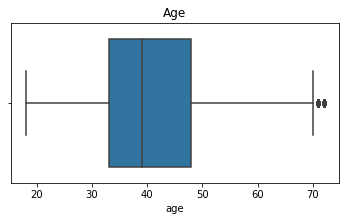

In [30]:
#checking outliers removed ot not
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.boxplot(train['age'])
plt.title("Age")
plt.show()

In [41]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

## Scaling train data Using StandardScaler

In [43]:
scaler = StandardScaler()
features_to_scale =['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome',]
scaled_features = scaler.fit_transform(train[features_to_scale])
scaled_df = train.copy()
scaled_df[features_to_scale] = scaled_features

In [45]:
scaled_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,1.522811,-1.277418,-0.276906,2.376931,-0.139916,0.494277,-1.106956,-0.447423,0.359876,0.374734,2.008403,-1.008335,-0.23551,-0.361901,-0.330792,0.377632,0
1,-0.957368,0.081926,-0.276906,-0.301360,-0.139916,-0.628157,-1.106956,-0.447423,-0.735486,0.493893,0.354372,-0.761252,-0.23551,-0.361901,-0.330792,0.377632,0
2,-1.354197,0.897533,-0.276906,-0.301360,-0.139916,-0.111721,0.903378,-0.447423,-0.735486,0.255575,0.354372,0.022055,-0.75208,-0.361901,-0.330792,0.377632,0
3,1.622018,-0.189943,-1.927894,1.037785,-0.139916,1.281726,-1.106956,-0.447423,-0.735486,0.732212,-0.059136,3.318250,-0.75208,0.846358,2.536730,-0.766204,1
4,-0.957368,1.441270,-0.276906,-0.301360,-0.139916,-0.560694,0.903378,-0.447423,-0.735486,-1.412653,-1.713166,0.758047,-0.75208,-0.361901,-0.330792,0.377632,0


Now training data looks good

## Test Data Cleaning

In [31]:
test.drop('ID',axis=1,inplace=True)

In [32]:
test[['default','housing','loan']]=test[['default','housing','loan']].replace(["yes","no"],["1","0"])
test['month']=test['month'].replace(["jan","feb","mar","apr","may","jun","jul", "aug","sep","oct","nov","dec"],["1","2","3","4","5","6","7","8","9","10","11","12"])
test['job']=test['job'].replace(['unknown'],['other'])


test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,services,married,secondary,0,118,1,0,cellular,15,5,20,6,-1,0,unknown
1,78,retired,divorced,primary,0,2787,0,0,telephone,1,7,372,1,-1,0,unknown
2,31,self-employed,single,tertiary,0,144,1,0,unknown,16,5,676,1,-1,0,unknown
3,57,services,single,primary,0,3777,1,0,telephone,13,5,65,2,-1,0,unknown
4,45,blue-collar,divorced,secondary,0,-705,0,1,unknown,3,7,111,1,-1,0,unknown


In [33]:
le=LabelEncoder()
test['job']=le.fit_transform(test['job'])
test['education']=le.fit_transform(test['education'])
test['poutcome']=le.fit_transform(test['poutcome'])
test['marital']=le.fit_transform(test['marital'])
test['contact']=le.fit_transform(test['contact'])

In [34]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,8,1,1,0,118,1,0,0,15,5,20,6,-1,0,3
1,78,6,0,0,0,2787,0,0,1,1,7,372,1,-1,0,3
2,31,7,2,2,0,144,1,0,2,16,5,676,1,-1,0,3
3,57,8,2,0,0,3777,1,0,1,13,5,65,2,-1,0,3
4,45,1,0,1,0,-705,0,1,2,3,7,111,1,-1,0,3


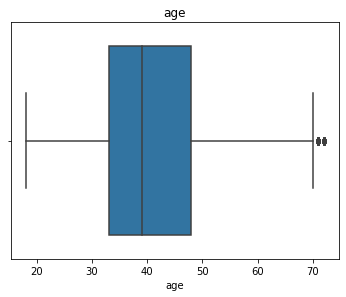

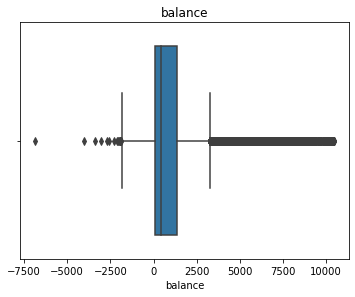

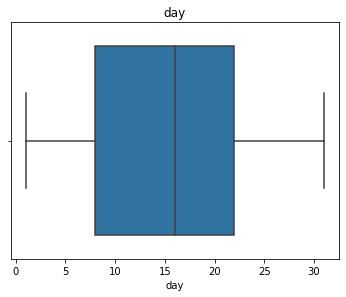

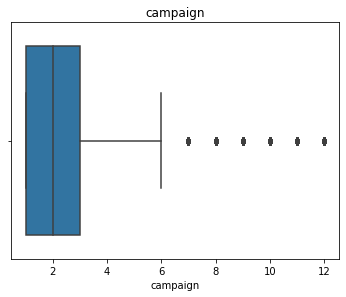

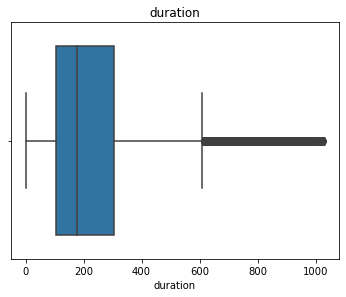

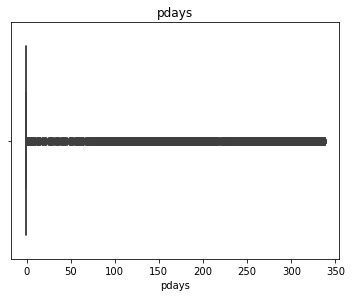

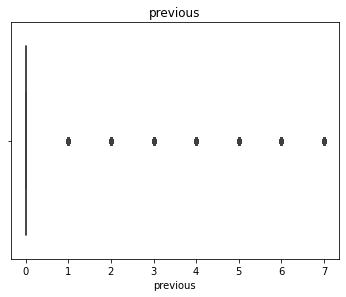

In [37]:
col=train[['age','balance','day','campaign','duration','pdays','previous']]
for i in col:
  n=1
  plt.figure(figsize=(20,20))
  plt.subplot(4,3,1)
  sns.boxplot(train[i])
  plt.title(i)
  plt.show()
  n=n+1

Observation:
- There are outliers present in my dataset

In [38]:
z = np.abs(stats.zscore(test[['age','balance','duration','campaign','pdays','previous']]))
print(z)
test=test[(z<3).all(axis=1)]
test.shape

            age   balance  duration  campaign     pdays  previous
0      0.838114  0.402389  0.921849  1.058702  0.418199  0.297500
1      3.499987  0.463375  0.439963  0.574850  0.418199  0.297500
2      0.932421  0.393955  1.616074  0.574850  0.418199  0.297500
3      1.519549  0.784508  0.747754  0.248140  0.418199  0.297500
4      0.387871  0.669352  0.569789  0.574850  0.418199  0.297500
...         ...       ...       ...       ...       ...       ...
13559  0.177969  0.426069  0.426644  0.405281  0.418199  0.297500
13560  1.236630  0.299239  0.387957  0.574850  0.418199  0.297500
13561  0.555195  0.348218  0.473070  0.574850  0.418199  0.297500
13562  1.121034  0.290155  0.194517  0.248140  0.483926  1.203911
13563  1.121034  0.440017  0.312293  0.574850  3.141273  0.202970

[13564 rows x 6 columns]


(12034, 16)

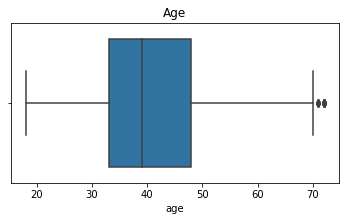

In [39]:
#checking outliers removed ot not
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.boxplot(test['age'])
plt.title("Age")
plt.show()

## Scaling test data Using StandardScaler

In [46]:
test.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [47]:

scaler = StandardScaler()
features_to_scale =['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome',]
scaled_features = scaler.fit_transform(test[features_to_scale])
test = test.copy()
test[features_to_scale] = scaled_features

In [48]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,-0.857298,0.891260,-0.273350,-0.298454,-0.134234,-0.555996,0.897827,-0.436241,-0.725087,-0.085446,-0.473720,-1.131406,1.880869,-0.371972,-0.346263,0.390323
2,-0.956183,0.619434,1.368116,1.050250,-0.134234,-0.541070,0.897827,-0.436241,1.472546,0.035213,-0.473720,2.308206,-0.761852,-0.371972,-0.346263,0.390323
3,1.614839,0.891260,1.368116,-1.647159,-0.134234,1.544558,0.897827,-0.436241,0.373729,-0.326763,-0.473720,-0.895457,-0.233308,-0.371972,-0.346263,0.390323
4,0.428213,-1.011519,-1.914817,-0.298454,-0.134234,-1.028463,-1.113800,2.292308,1.472546,-1.533350,0.354877,-0.654265,-0.761852,-0.371972,-0.346263,0.390323
5,-0.857298,-0.196042,1.368116,1.050250,-0.134234,-0.623737,0.897827,-0.436241,-0.725087,0.759165,0.354877,1.149434,-0.233308,-0.371972,-0.346263,0.390323


Now test data is looking good

## Splitting into feature and label

In [44]:
X = scaled_df.drop(['subscribed'], axis=1)
y = scaled_df['subscribed']

## Data Balancing Using SMOTE

In [49]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [50]:
y_resampled.value_counts()

0    25264
1    25264
Name: subscribed, dtype: int64

In [51]:
X_resampled.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.522811,-1.277418,-0.276906,2.376931,-0.139916,0.494277,-1.106956,-0.447423,0.359876,0.374734,2.008403,-1.008335,-0.23551,-0.361901,-0.330792,0.377632
1,-0.957368,0.081926,-0.276906,-0.301360,-0.139916,-0.628157,-1.106956,-0.447423,-0.735486,0.493893,0.354372,-0.761252,-0.23551,-0.361901,-0.330792,0.377632


## Train Test Split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify = y_resampled, random_state=42)

## Model Training

## Logistic Regression

Logistic Regression with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      5053
           1       0.81      0.81      0.81      5053

    accuracy                           0.81     10106
   macro avg       0.81      0.81      0.81     10106
weighted avg       0.81      0.81      0.81     10106

Cross-Validation Scores: [0.90204444 0.90506667 0.9024     0.89991111 0.9052276 ]
Mean Cross-Validation Score: 0.9029299636478584


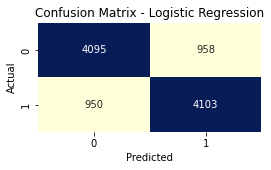

ROC AUC Score: 0.8851615190479042


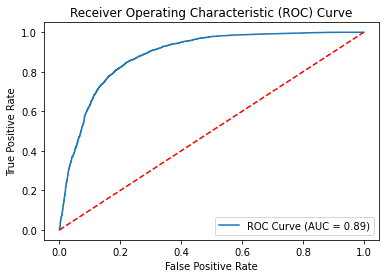

In [53]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create the Logistic Regression Classifier
LG = LogisticRegression()

# Create the grid search object
grid_search = GridSearchCV(LG, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Logistic Regression Classifier with the best parameters
best_LG = LogisticRegression(**best_params)

# Fit the model on the training data
best_LG.fit(X_train, y_train)

# Make predictions on the test set
LG_y_pred = best_LG.predict(X_test)

print("Logistic Regression with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, LG_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_LG, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, LG_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#ROC AUC Score
y_prob = best_LG.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)


## ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='1')
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## DecisionTree Classifier

Decision Tree Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      5053
           1       0.92      0.93      0.92      5053

    accuracy                           0.92     10106
   macro avg       0.92      0.92      0.92     10106
weighted avg       0.92      0.92      0.92     10106

Cross-Validation Scores: [0.88942222 0.88533333 0.8864     0.88693333 0.89260313]
Mean Cross-Validation Score: 0.8881384036668247


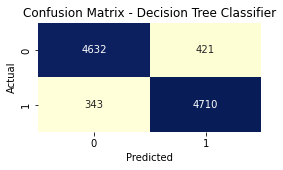

ROC AUC Score: 0.9244013457352068


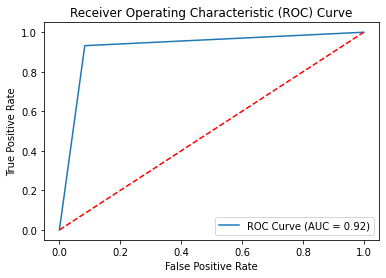

In [54]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the Decision Tree Classifier
dt = DecisionTreeClassifier()

# Create the grid search object
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Decision Tree Classifier with the best parameters
best_dt = DecisionTreeClassifier(**best_params)

# Fit the model on the training data
best_dt.fit(X_train, y_train)

# Make predictions on the test set
dt_y_pred = best_dt.predict(X_test)

print("Decision Tree Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, dt_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_dt, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, dt_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#ROC AUC Score
y_prob = best_dt.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)


#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='1')
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Random Forest Classifier

Random Forest Classifier with Hyperparameter Tuning:
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      5053
           1       0.95      0.97      0.96      5053

    accuracy                           0.96     10106
   macro avg       0.96      0.96      0.96     10106
weighted avg       0.96      0.96      0.96     10106

Cross-Validation Scores: [0.91591111 0.91644444 0.91235556 0.91466667 0.91625178]
Mean Cross-Validation Score: 0.9151259111743322


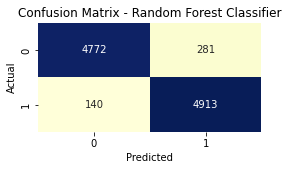

ROC AUC Score: 0.9937029842662436


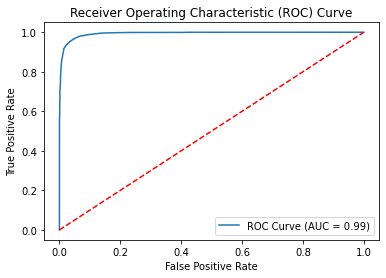

In [55]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the Random Forest Classifier
RF = RandomForestClassifier()

# Create the grid search object
grid_search = GridSearchCV(RF, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Create the Random Forest Classifier with the best parameters
best_RF = RandomForestClassifier(**best_params)

# Fit the model on the training data
best_RF.fit(X_train, y_train)

# Make predictions on the test set
RF_y_pred = best_RF.predict(X_test)

print("Random Forest Classifier with Hyperparameter Tuning:")
# Classification Report
print("Classification Report:")
print(classification_report(y_test, RF_y_pred))

# Cross-Validation Score
scores = cross_val_score(best_RF, X, y, cv=5)
print("Cross-Validation Scores:", scores)
mean_score = scores.mean()
print("Mean Cross-Validation Score:", mean_score)

# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, RF_y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#ROC AUC Score
y_prob = best_RF.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

#roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='1')
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Creating dataset Of all Models

In [56]:
# Create a list of model names
model_names = [ 'Random Forest Classifier', 'Decision Tree Classifier', 'Logistic Regression']

# Create a list of models and their corresponding accuracy scores
models = [ RF, dt, LG]
accuracy_scores = [ accuracy_score(y_test, RF_y_pred), accuracy_score(y_test, dt_y_pred), accuracy_score(y_test, LG_y_pred)]

# Create a dataframe with model name and accuracy score
df = pd.DataFrame({'Model Name': model_names, 'Accuracy Score': accuracy_scores})

# Sort the dataframe by accuracy score in descending order
df = df.sort_values('Accuracy Score', ascending=False)

# Print the dataframe
df.index = range(1, len(df)+1)
print(df)


                 Model Name  Accuracy Score
1  Random Forest Classifier        0.958342
2  Decision Tree Classifier        0.924401
3       Logistic Regression        0.811201


## predicting test data based on training data using  best model

In [57]:
test_pred = best_RF.predict(test)
test_pred

array(['0', '1', '0', ..., '0', '0', '1'], dtype=object)

 Here 0=no, 1=yes

## Saving model

In [58]:
import pickle
with open('best_model','wb') as f:
    pickle.dump(best_RF,f)

In [59]:
pickle.dump(scaler, open('scaler.pkl','wb'))

# Project Completed